In [ ]:
# !pip install geopandas
# !pip install rtree

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# Links to pull data from the DC OpenData portal

neighborhood_clusters = "https://opendata.arcgis.com/datasets/f6c703ebe2534fc3800609a07bad8f5b_17.geojson"

construction_permits = {
    "2021": "https://opendata.arcgis.com/datasets/da3da798fb4f4f0e9de5c3a17c39351f_10.geojson",
    "2020": "https://opendata.arcgis.com/datasets/ac617c291bbd466bbbea6272f87811d3_8.geojson",
    "2019": "https://opendata.arcgis.com/datasets/107f535e5d3347a8ac1e46dbc13669d4_6.geojson",
    "2018": "https://opendata.arcgis.com/datasets/ca581e1b455a46caa266e3476f8205d2_0.geojson",
    "2017": "https://opendata.arcgis.com/datasets/585c8c3ef58c4f1ab1ddf1c759b3a8bd_39.geojson",
    "2016": "https://opendata.arcgis.com/datasets/2dc1a7dbb705471eb38af39acfa16238_28.geojson", 
    "2015": "https://opendata.arcgis.com/datasets/b3283607f9b74457aff420081eec3190_29.geojson",
    "2014": "https://opendata.arcgis.com/datasets/54b57e15f6944af8b413a5e4f88b070c_13.geojson",
    "2013": "https://opendata.arcgis.com/datasets/3d49e06d51984fa2b68f21eed21eba1f_14.geojson",
    "2012": "https://opendata.arcgis.com/datasets/9cbe8553d4e2456ab6c140d83c7e83e0_15.geojson"
}

# Read the Neighborhood Clusters File

In [ ]:
gdf_clusters = gpd.read_file(neighborhood_clusters, driver="geoJSON")
gdf_clusters.head()

,OBJECTID,WEB_URL,NAME,NBH_NAMES,TYPE,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN,geometry
0,1,http://planning.dc.gov/,Cluster 16,"Colonial Village, Shepherd Park, North Portal ...",Original,{8D235E97-D58C-4891-943E-307143103BD9},None,None,None,None,0,0,"POLYGON ((-77.02829 38.98608, -77.02952 38.987..."
1,2,None,Cluster 41,Rock Creek Park,Additional,{939C23A8-8EE2-4B4F-85EE-88281BCCC9A0},None,None,None,None,0,0,"POLYGON ((-77.04391 38.98432, -77.04418 38.984..."
2,3,http://planning.dc.gov/,Cluster 10,"Hawthorne, Barnaby Woods, Chevy Chase",Original,{8EADC8B8-3DAD-4E5D-AAF8-BF63D8316317},None,None,None,None,0,0,"POLYGON ((-77.05530 38.95900, -77.05530 38.959..."
3,4,http://planning.dc.gov/,Cluster 17,"Takoma, Brightwood, Manor Park",Original,{5BF4BCEC-5022-4B96-9577-C0246154197C},None,None,None,None,0,0,"POLYGON ((-77.01418 38.97237, -77.01403 38.972..."
4,5,None,Cluster 40,Walter Reed,Additional,{C6705A7B-212E-419A-93CB-DA60707D0C37},None,None,None,None,0,0,"POLYGON ((-77.03286 38.97800, -77.03297 38.978..."


In [ ]:
type(gdf_clusters)

geopandas.geodataframe.GeoDataFrame

In [ ]:
gdf_clusters.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
gdf_clusters.to_crs(3857).area.sum()

293472467.71598655

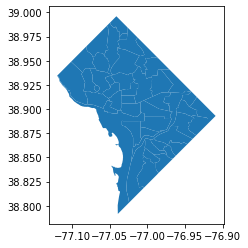

In [ ]:
gdf_clusters.plot()

# Read the Construction Permits Files

In [ ]:
gdf_list = []
for year, url in construction_permits.items():  
    gdf_permits = gpd.read_file(url, driver="geoJSON")
    gdf_permits["year"] = year
    
    gdf_list.append(gdf_permits)

In [ ]:
gdf = pd.concat(gdf_list)
gdf.shape

(151150, 34)

# Add Cluster and Neighborhood Name to the Permit Data

In [ ]:
gdf_join = gdf.sjoin(gdf_clusters[["NAME", "NBH_NAMES", "geometry"]], how="left", predicate="within")
gdf_join.head()

,OBJECTID,APPLICATIONDATE,ISEXCAVATION,ISFIXTURE,ISPAVING,ISLANDSCAPING,ISPROJECTIONS,ISPSRENTAL,TRACKINGNUMBER,PERMITNUMBER,...,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,geometry,year,index_right,NAME,NBH_NAMES
0,132528624,2019-11-23T05:31:31+00:00,F,T,F,F,F,F,341767,PA341767,...,{E710C9D0-3E24-0BAF-E053-782F520A589B},None,None,None,None,POINT (-76.97442 38.92237),2021,20.0,Cluster 22,"Brookland, Brentwood, Langdon"
1,132528627,2020-08-06T19:02:10+00:00,F,F,F,F,F,F,357263,PA357263,...,{E710C9D0-3E27-0BAF-E053-782F520A589B},None,None,None,None,POINT (-77.03343 38.95947),2021,7.0,Cluster 18,"Brightwood Park, Crestwood, Petworth"
2,132528632,2021-01-08T13:27:32+00:00,F,F,F,F,F,F,365940,PA365940,...,{E710C9D0-3E2C-0BAF-E053-782F520A589B},None,None,None,None,POINT (-76.94746 38.90043),2021,33.0,Cluster 30,"Mayfair, Hillbrook, Mahaning Heights"
3,132528636,2021-01-13T03:48:18+00:00,F,F,F,F,F,F,366176,PA366176,...,{E710C9D0-3E30-0BAF-E053-782F520A589B},None,None,None,None,POINT (-76.94260 38.89600),2021,33.0,Cluster 30,"Mayfair, Hillbrook, Mahaning Heights"
4,132528642,2021-01-18T22:20:40+00:00,F,F,F,F,F,F,366448,PA366448,...,{E710C9D0-3E36-0BAF-E053-782F520A589B},None,None,None,None,POINT (-77.03137 38.94523),2021,7.0,Cluster 18,"Brightwood Park, Crestwood, Petworth"


# Count Permits per Cluster per Year

In [ ]:
counts_by_year = gdf_join.value_counts(["year", "NAME"]).to_frame().reset_index().sort_values(["NAME", "year"])
counts_by_year.columns = ["year", "cluster", "permit_count"]
counts_by_year

,year,cluster,permit_count
312,2012,Cluster 1,148
216,2013,Cluster 1,263
192,2014,Cluster 1,300
124,2015,Cluster 1,432
148,2016,Cluster 1,381
...,...,...,...
144,2017,Cluster 9,389
112,2018,Cluster 9,463
117,2019,Cluster 9,450
63,2020,Cluster 9,611


# Merge all the Data Together

In [ ]:
pivoted_df = counts_by_year.pivot(index="cluster", columns="year", values="permit_count")

pivoted_gdf = pd.merge(pivoted_df, gdf_clusters[["NAME", "NBH_NAMES", "geometry"]], how="left", left_index=True, right_on="NAME")
pivoted_gdf = gpd.GeoDataFrame(pivoted_gdf, geometry="geometry", crs=4326)

# Add the Percent Change from 2012 to 2021

In [ ]:
pivoted_gdf["per_change"] = (pivoted_gdf["2021"] / pivoted_gdf["2012"]) * 100

# Plot the Top 10 Clusters with the Highest Percent Change

In [ ]:
top_10 = pivoted_gdf.sort_values("per_change", ascending=False).head(10)

In [ ]:
years = top_10.columns[0:-4]
years

Index(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

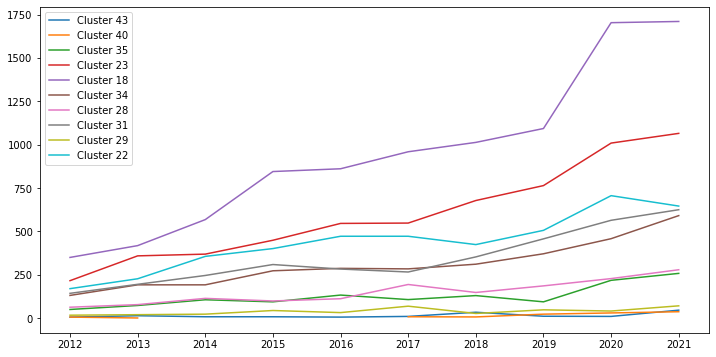

In [ ]:
plt.figure(figsize=(12, 6))

for idx, row in top_10.iterrows():
    plt.plot(years, row[years], label=row["NAME"])

plt.legend()

# Plot all the Neighborhood Clusters as a HeatMap

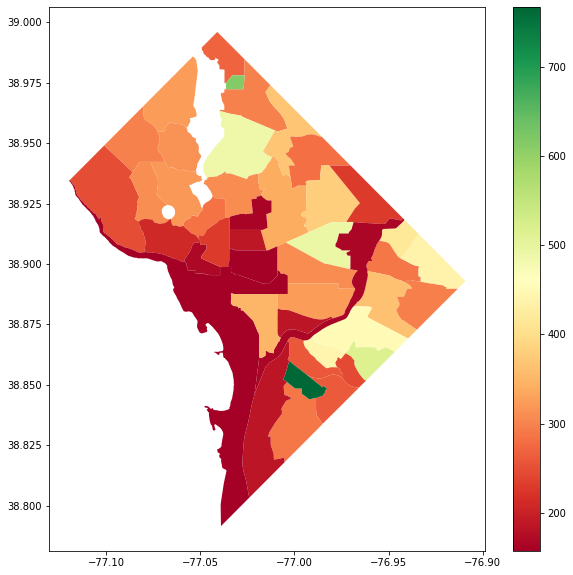

In [ ]:
pivoted_gdf.plot(column="per_change", cmap="RdYlGn", legend=True, figsize=(10, 10))

# Write to File

In [ ]:
pivoted_gdf.to_file("construction_permits_by_cluster_by_year.geojson", driver="GeoJSON")